<a href="https://colab.research.google.com/github/kayleefoor/Foor_DSPN_S24/blob/main/Exercise_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 18: Principal component methods

This homework assignment is designed to give you an intuition on principal component approaches to understanding high dimensional statistical relationships.

Like earlier homework, you will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading data (1 point)

We are going to look for low dimensional relationships between brain volume measures and working memory capacity.

First, we will need to load the `pls`, `tidyverse`, and `ggplot2` libraries for this assignment.


In [1]:
install.packages("pls")
library(pls)
library(tidyverse)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Use `read.csv` function to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file in the **hcp_data** folder.

(a) Using the tidyverse tools, make a new dataframe `d1` that only includes the Flanker Task performance (`Flanker_Unadj`) and *all* freesurfer **volume** measures for the right and left hemispheres together. Remove both "na's" and any columns that consist of only zeros.

Hint: Look up using the `ends_with` function to only select variables that end with "_Vol"

Use the `head` function to look at the first few rows of each data frame.

In [5]:
d1 <- d1 <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv") |>
  select(Flanker_Unadj, ends_with("_Vol")) |>
  na.omit() |>
  select_if(~ !all(. == 0))
head(d1)

,Flanker_Unadj,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,130.42,1864518,1406924,304488,305634,610122,70240,807245,1239692,269963,⋯,80,1613,0,1269,325,800,409,569,522,813
3,112.56,1512540,1109710,240030,243207,483238,56623,664124,957615,203472,⋯,70,1007,0,1155,195,1029,526,578,576,649
4,121.18,1684117,1280171,260695,265243,525938,63869,726206,1106881,247504,⋯,88,1303,0,1279,302,972,589,528,471,858
5,126.53,1816044,1321362,276506,278002,554508,74869,762308,1155067,254742,⋯,81,909,0,1154,296,1065,618,838,729,1072
6,101.85,1437868,1053766,203718,210539,414257,58813,579632,916973,213012,⋯,75,1215,3,377,235,1057,591,538,430,849
7,107.04,1512727,1126655,242489,248807,491296,62092,665024,984952,205342,⋯,93,1331,17,554,258,1033,494,487,489,992


---
## 2. Correlational structure (4 points)

(a) Take a look at the correlation between all of the freesurfer volume measures ("FS_") using the `cor` function. Create a new variable called `fs_cor` that is the correlation matrix for only the freesurfer volumes

In [15]:
fs_cor <- cor(d1[ , grepl("^FS_", names(d1))])
head(fs_cor)

,FS_IntraCranial_Vol,FS_BrainSeg_Vol,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,FS_SubCort_GM_Vol,FS_Total_GM_Vol,FS_SupraTentorial_Vol,FS_L_WM_Vol,FS_R_WM_Vol,⋯,FS_R_Vessel_Vol,FS_R_ChoroidPlexus_Vol,FS_5thVent_Vol,FS_WM_Hypointens_Vol,FS_OpticChiasm_Vol,FS_CC_Posterior_Vol,FS_CC_MidPosterior_Vol,FS_CC_Central_Vol,FS_CC_MidAnterior_Vol,FS_CC_Anterior_Vol
FS_IntraCranial_Vol,1.0000000,0.8977578,0.8400174,0.8439151,0.8452780,0.7885140,0.8751297,0.8851581,0.8311086,0.8278063,⋯,0.1536332,0.4286121,0.08758425,0.2225826,0.3309762,0.3448680,0.1896089,0.1973414,0.2845997,0.4018212
FS_BrainSeg_Vol,0.8977578,1.0000000,0.9448159,0.9482717,0.9502618,0.8689939,0.9664839,0.9958421,0.9502506,0.9482723,⋯,0.2067837,0.4125810,0.04979092,0.3231443,0.3500672,0.3767737,0.2724347,0.2707686,0.3534842,0.4308723
FS_LCort_GM_Vol,0.8400174,0.9448159,1.0000000,0.9844592,0.9960196,0.7897863,0.9821287,0.9485617,0.8282356,0.8220444,⋯,0.1700152,0.3516475,0.02747529,0.3272222,0.2735485,0.2515157,0.1961809,0.2089434,0.2572979,0.3140626
FS_RCort_GM_Vol,0.8439151,0.9482717,0.9844592,1.0000000,0.9961939,0.7925724,0.9830322,0.9518674,0.8330846,0.8307516,⋯,0.1759543,0.3441177,0.03430310,0.3390336,0.2834184,0.2444868,0.1918267,0.2118854,0.2590016,0.3054070
FS_TotCort_GM_Vol,0.8452780,0.9502618,0.9960196,0.9961939,1.0000000,0.7942866,0.9864250,0.9539460,0.8339331,0.8296759,⋯,0.1736941,0.3491995,0.03104854,0.3344959,0.2796276,0.2489306,0.1947377,0.2112533,0.2591679,0.3108966
FS_SubCort_GM_Vol,0.7885140,0.8689939,0.7897863,0.7925724,0.7942866,1.0000000,0.8407289,0.8591265,0.8248311,0.8250502,⋯,0.2308144,0.3810439,0.02854927,0.2779295,0.3280826,0.3636716,0.3169406,0.2701718,0.3320954,0.4041212


(b) Load (and install locally if needed) the `reshape2` library in order to use the `melt` function on the new `fs_cor` object. Use `head` to show the new, melted `fs_cor` object.

In [13]:
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [14]:
fs_cor.melt <- melt(fs_cor)
head(fs_cor.melt)

,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,FS_IntraCranial_Vol,FS_IntraCranial_Vol,1.0000000
2,FS_BrainSeg_Vol,FS_IntraCranial_Vol,0.8977578
3,FS_LCort_GM_Vol,FS_IntraCranial_Vol,0.8400174
4,FS_RCort_GM_Vol,FS_IntraCranial_Vol,0.8439151
5,FS_TotCort_GM_Vol,FS_IntraCranial_Vol,0.8452780
6,FS_SubCort_GM_Vol,FS_IntraCranial_Vol,0.7885140


Plot the correlation as a heatmap using `ggplot2`.

Hint: use the `scale_fill_gradient2` function to scale the colors between red and blue, capping the values at -1 and +1.

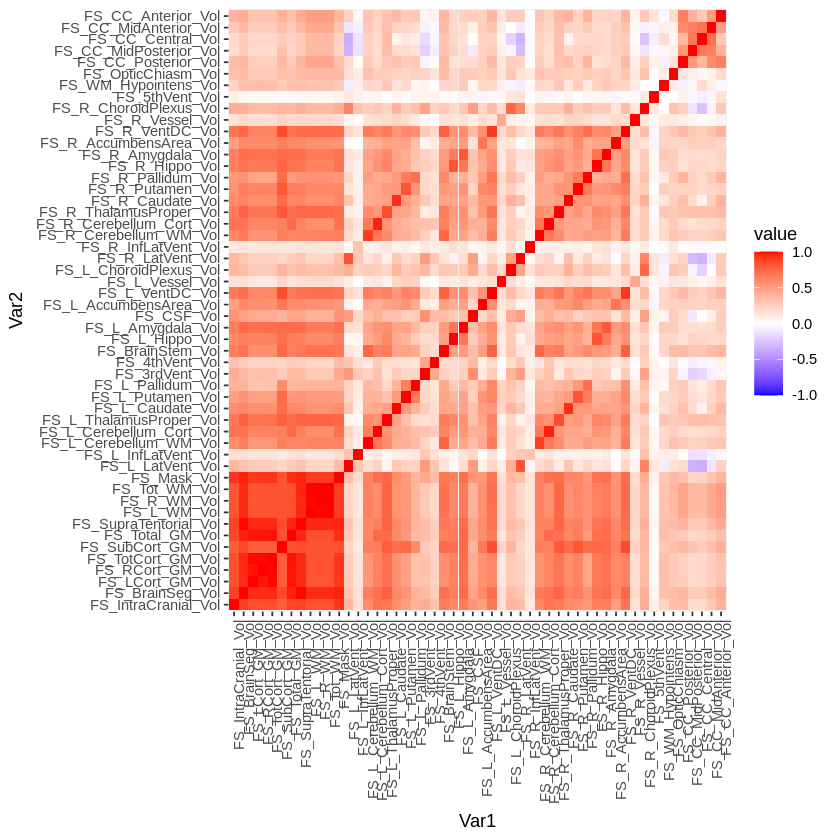

In [16]:
ggplot(data = fs_cor.melt, aes(x=Var1, y=Var2, fill=value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", limits=c(-1,1)) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))



What patterns do you see in the correlations?

> *Virtually all correlation pairs are positively correlated, with those in the bottom-left corner of the matrix having the strongest positive correlations.*
>


---
## 3. Principal component analysis (3 points)

Let's see how many principal components explain at *at least* 95% of the data.

(a) Create a new object called `fs_d.pca` using the `princomp` function (do not forget to scale the data).


In [18]:
fs_d.pca <- princomp(d1[ , grepl("^FS_", names(d1))], cor = TRUE)

(b) Calculate the cumulative variance explained (not unique variance explained as in the tutorial) across the principal components and plot the results using `ggplot`.

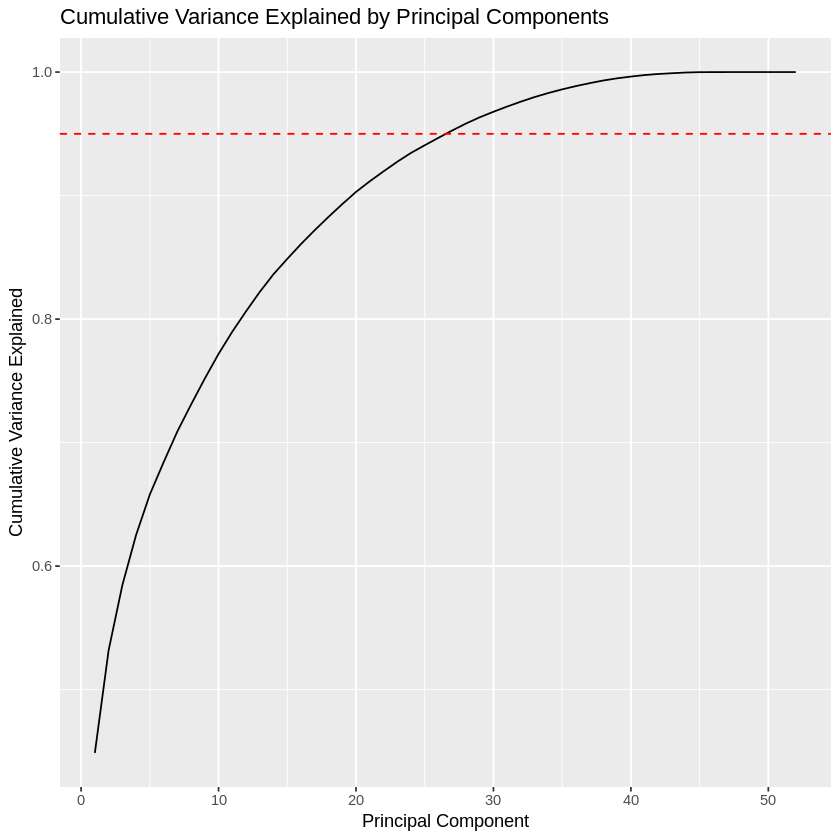

In [19]:
cum_var_explained <- cumsum(fs_d.pca$sdev^2) / sum(fs_d.pca$sdev^2)

cum_var_df <- data.frame(
  PC = 1:length(cum_var_explained),
  CumulativeVariance = cum_var_explained
)

ggplot(cum_var_df, aes(x = PC, y = CumulativeVariance)) +
  geom_line() +
  geom_hline(yintercept = 0.95, linetype = "dashed", color = "red") +
  labs(x = "Principal Component", y = "Cumulative Variance Explained") +
  ggtitle("Cumulative Variance Explained by Principal Components")

(c) Determine exactly how many principal components explain at least 95% of the variance.

Hint: Look up the `which` function.

In [20]:
which(cum_var_explained >= 0.95)[1]

Comp.27 
     27

What does this tell you about the underlying dimensionality of the brain volume measures?

> *We found that 27 PCs explain 95% of the variance. This suggests that the data is more dimensional, as each PC is important to capture the data's variance*


---
## 4. Associating with Flanker task peformance (4 points)

Now apply PCR to the `d1` object you created at the beginning (which includes the Flanker task scores) to find how freesurfer volumes predict Flanker task performance. Set the random seed to "2". Use cross-validation as the validation type and don't forget to scale your data. Show the `summary` of the model fit.

Hint: If you receive an error applying the "scale=TRUE" flag, then you likely still have columns of all zeros somewhere in your data table.

In [21]:
set.seed(2)
pcr_model <- pcr(Flanker_Unadj ~ ., data = d1, scale = TRUE, validation = "CV")
summary(pcr_model)


Data: 	X dimension: 1113 52 
	Y dimension: 1113 1
Fit method: svdpc
Number of components considered: 52

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           10.08    9.925    9.924    9.933    9.922    9.924    9.912
adjCV        10.08    9.924    9.923    9.932    9.920    9.922    9.910
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       9.889    9.891    9.893     9.896     9.909     9.918     9.934
adjCV    9.886    9.887    9.890     9.892     9.904     9.913     9.927
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        9.941     9.945     9.934     9.899     9.896     9.907     9.914
adjCV     9.934     9.939     9.928     9.889     9.886     9.897     9.903
       21 comps  22 comps  23 comps  24 comps  25 comps  26 comps  27 comps
CV        9.922     9.930     9.939     9.955     9.968     9.971     9.979
adjCV     9.911  

(b) Use the `validationplot` function to evaluate the bias-variance tradeoff using the cross-validated mean squared-error for each component.

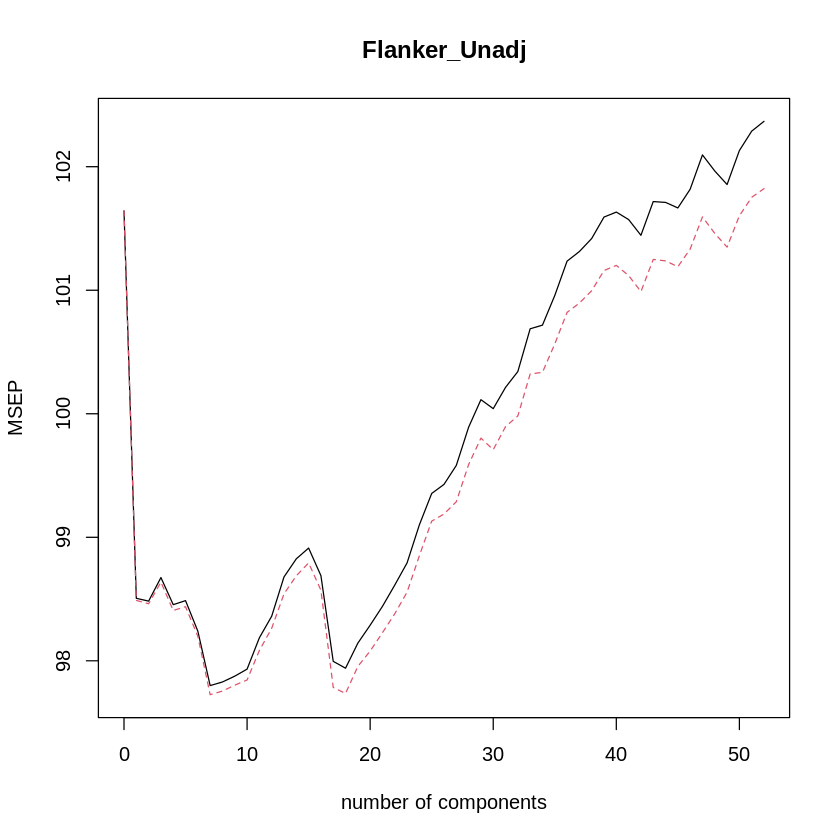

In [22]:
validationplot(pcr_model, val.type="MSEP")

(c) Extract the MSEP values of the cross validated fit ("CV" not "adj_CV") from the model object using the `MSEP` funtion. Create a new array of these values. Use the `drop` function to remove the singleton dimension (the original array is 2x1x53 and we want a 2x53 object). Find the minimum value of the first row (the "CV").

In [23]:
msep_values <- drop(MSEP(pcr_model)$val)
min(msep_values[1, ])

[1] 97.79933

What what does this plot tell you about how many components best explain variance in Flanker task performance?

> *The plot shows that the best number of principle components for this data is approximately 19, as this number of components is associated with the lowest MSEP.*

---
## 5. Reflection (2 points)

Compare the number of components that explain variance in X alone (the brain volumes) to the number of components that explain performance in the Flanker task. What does the difference in these two numbers tell you about how variation in brain volumes relates to task performance?

> *Fewer components explain Flanker task performance (around 19) than explain variance in brain volumes alone (27). This suggests that not all brain volume variations are equally important for task performance, indicating some redundancy or irrelevant information in the brain volume data concerning this specific task. The PCR analysis identifies the most relevant components, leading to a more efficient model and insights into crucial brain regions for Flanker task performance.*
>

**DUE:** 5pm EST, April 15, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*